In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("../../input/train.csv")
test = pd.read_csv("../../input/test.csv")

In [3]:
y = train["SalePrice"]
train = train.drop("SalePrice", axis=1)

In [4]:
data = pd.concat([train, test], axis=0).drop("Id", axis=1)

In [100]:
num_df = data.select_dtypes(exclude=['object'])
num_df = num_df.fillna(-999)

In [104]:
cat_df =  data.select_dtypes(include=['object'])

In [105]:
cat_df = cat_df.fillna("missing")
cat_df = pd.get_dummies(cat_df)

In [108]:
X = pd.concat([num_df, cat_df], axis=1)
X.shape

(2919, 658)

In [109]:
train_X = X.iloc[:train.shape[0], :]
test_X = X.iloc[train.shape[0]:, :]

In [110]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [111]:
from sklearn.model_selection import train_test_split

In [113]:
lgb_reg = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
lgb_reg.fit(train_X, y)

LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2, feature_fraction_seed=7,
       importance_type='split', learning_rate=0.01, max_bin=200,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=5000, n_jobs=-1, num_leaves=4,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [115]:
"""
lgbm_params = {"task":"train",
                            "boosting_type": "gbdt",
                            "objective":'regression', 
                            "num_leaves":4,
                            "learning_rate":0.01, 
                             "max_bin":200, 
                            "bagging_fraction":0.75,
                            "bagging_freq":5, 
                             "bagging_seed":7,
                            "feature_fraction":0.2,
                            "feature_fraction_seed":7,
                            "verbose":0
                                       #min_data_in_leaf=2,
                                       #min_sum_hessian_in_leaf=11
              }
"""

'\nlgbm_params = {"task":"train",\n                            "boosting_type": "gbdt",\n                            "objective":\'regression\', \n                            "num_leaves":4,\n                            "learning_rate":0.01, \n                             "max_bin":200, \n                            "bagging_fraction":0.75,\n                            "bagging_freq":5, \n                             "bagging_seed":7,\n                            "feature_fraction":0.2,\n                            "feature_fraction_seed":7,\n                            "verbose":0\n                                       #min_data_in_leaf=2,\n                                       #min_sum_hessian_in_leaf=11\n              }\n'

In [116]:
"""
lgb_reg = lgb.train(lgbm_params,
                            lgbtrain, 
                            num_boost_round=20000, 
                            valid_sets=[lgbtrain, lgbvalid],
                            valid_names=["train", "valid"],
                           early_stopping_rounds=50,
                           verbose_eval=100)
"""

'\nlgb_reg = lgb.train(lgbm_params,\n                            lgbtrain, \n                            num_boost_round=20000, \n                            valid_sets=[lgbtrain, lgbvalid],\n                            valid_names=["train", "valid"],\n                           early_stopping_rounds=50,\n                           verbose_eval=100)\n'

In [117]:
#lightgbm.fit(train_X, y)

In [118]:
sub = pd.read_csv("../../input/sample_submission.csv")
sub["SalePrice"] = lgb_reg.predict(test_X)

In [119]:
sub.to_csv("mode_lgbm_sub.csv", index=False)

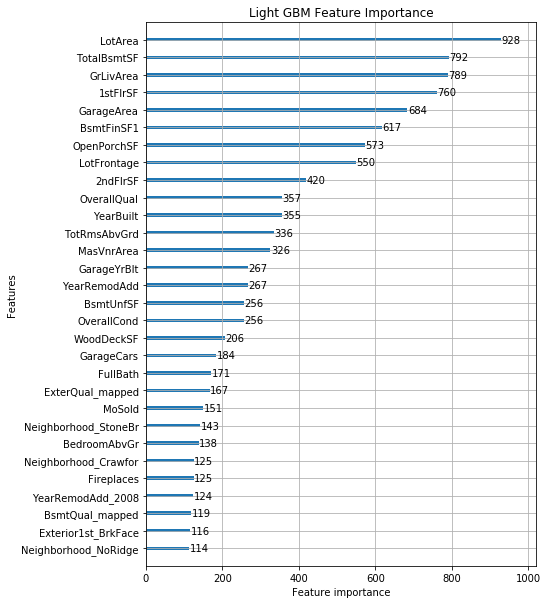

In [91]:
f, ax = plt.subplots(figsize=[7,10])
lgb.plot_importance(lgb_reg, max_num_features=30,  ax=ax)
plt.title("Light GBM Feature Importance")
plt.savefig('feature_import.png')

In [164]:
train.shape

(1460, 80)